## Gathering Data

In [110]:
import tweepy
import pandas as pd
import requests
import numpy as np
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer
import seaborn as sb

In [2]:
# Import the Twitter archive CSV file into a DataFrame

tac_df = pd.read_csv("C:\\Users\\Swapnil Saxena\\Desktop\\Data Engineering\\2.0 Data Wrangling\\Twitter Project\\twitter-archive-enhanced.csv")

In [3]:
# Downloading twitter data
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
# Save HTML to file
with open("image-predictions.tsv",mode="wb") as file:
    file.write(response.content)

In [5]:
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('C:\\Users\\Swapnil Saxena\\Desktop\\Data Engineering\\2.0 Data Wrangling\\Twitter Project\\image-predictions.tsv', sep='\t')

In [ ]:
# create an API object that you can use to gather Twitter data.
consumer_key = 'ch2eC6SDXAneZd5vnJqUoDGJV'
consumer_secret = '5AH941QwAjbLrp8pWcfAeLCHL0D6L9xjVuUG8vVmr3ubpOt8ni'
access_token = '726520236-0DbTYjitt87h0H9kTI4bBvDDOn0TiRpbb4iZmMd7'
access_secret = 'yAKASSpZpOvqTNh0uDGJiyAJ78JOnDNbZyEwSzkycvueM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
api

In [ ]:
# For loop which will add each available tweet to a new line of tweet_json.txt
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'a', encoding='utf8') as f :
    for tweet_id in tac_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        try:
            status = json.loads(line)
        
            # Append to list of dictionaries
            df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })
        except:
            continue

# Create a DataFrame with tweet ID, retweet count and favorite count
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Accessing data

In [10]:
# View first 5 rows of tac_df DataFrame
tac_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# View last 5 rows of tac_df dataframe
tac_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
# View info of tac_df DataFrame
tac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id, timestamp

In [13]:
# View descriptive statistics of tac_df DataFrame
tac_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# View first 5 rows of img_df DataFrame
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# View last 5 rows of img_df DataFrame
img_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
# View Info of img_df DataFrame
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# View descriptive statistics of img_df DataFrame
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# View first 5 rows of status_df DataFrame
status_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


 Join 'status_df' to 'tac_df'

In [19]:
# View last 5 rows of status_df DataFrame
status_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [20]:
# View info of status_df DataFrame
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
# View descriptive statistics of status_df DataFrame
status_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Dataset contains retweets

In [22]:
# In twitter_archieve dataset we only tweets and no re-tweets 
len(tac_df[tac_df.retweeted_status_id.isnull() == False])

181

#### Tweets with no images

In [23]:
# Check record in tac_df Dataframe which does not have matching image
len(tac_df[~tac_df.tweet_id.isin(img_df.tweet_id)])

281

#### Contents of 'text' column is not displayable

In [24]:
tac_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Incorrect dog name in column "name"  

In [25]:
# Sort values of 'name' column alphabetically - lowercase values appear at the bottom
tac_df.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [26]:
# Rows where value of 'name' is lowercase means not an actual name
tac_df.loc[(tac_df['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [27]:
# Number of records whose both doggo and floofer columns are not None
tac_df[(tac_df.doggo != 'None') & (tac_df.floofer != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [28]:
# Number of records whose both doggo and pupper columns are not None
tac_df[(tac_df.doggo != 'None') & (tac_df.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [29]:
# Number of records whose both doggo and pupper columns are not None
tac_df[(tac_df.doggo != 'None') & (tac_df.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [30]:
# Number of records whose both floofer and pupper columns are not None
tac_df[(tac_df.floofer != 'None') & (tac_df.pupper != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
# Number of records whose both floofer and puppo columns are not None
tac_df[(tac_df.floofer != 'None') & (tac_df.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
# Number of records whose both pupper and puppo columns are not None
tac_df[(tac_df.pupper != 'None') & (tac_df.puppo != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Remove extra characters after '&' in twitter_archive_clean['text']

In [33]:
# View rows in tac_df which contain '&amp;' instead of '&' in 'text' column
tac_df[tac_df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


#### Change sources to more readable categories.

In [34]:
# View number of entries for each source
tac_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Incorrect values are extracted from Rating numerator and denominator columns.

In [35]:
# Sort by rating_denominator values
tac_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [36]:
# Sort by rating_numerator values
tac_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

### Quality
1.) Erroneous datatypes (timestamp, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id).                  
2.) Data contains retweet hence duplicate records     
3.) Tweets with no images                                                                                                       
4.) Contents of 'text' column is not displayable                                                                               
5.) Incorrect dog name                                                                                                          
6.) Unnecessary html tags in source column in place of utility name                                                             
7.) Remove extra characters after '&' from "text" column                                                                                      
8.) rating_numerator is in float datatype for some records in the extended_urls 

### Tidiness


1.) tac_df without any duplicates (i.e. retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped                                                                        
2.) doggo, floofer, pupper and puppo columns in tac_df table should be merged into one column named "dog_stage"                      
3.) Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

## Clean

In [37]:
# Create copies of original DataFrames to work on
tac_df_clean = tac_df.copy()
img_df_clean = img_df.copy()
status_df_clean = status_df.copy()

### Define

#### Incorrect dog name to be replaced with none 

#### doggo, floofer, pupper and puppo columns in tac_df table should be merged into one column named "dog_stage"

### Code

In [38]:
# replace missing and faulty names with None value
tac_df_clean['name'].replace('the', 'None', inplace=True)
tac_df_clean['name'].replace("all",'None', inplace=True) 
tac_df_clean['name'].replace("this",'None', inplace=True) 
tac_df_clean['name'].replace("very",'None', inplace=True) 
tac_df_clean['name'].replace("life",'None', inplace=True)
tac_df_clean['name'].replace("an",'None', inplace=True)
tac_df_clean['name'].replace("my",'None', inplace=True)
tac_df_clean['name'].replace("O","None", inplace=True)
tac_df_clean['name'].replace("light",'None', inplace=True)
tac_df_clean['name'].replace("by",'None', inplace=True)
tac_df_clean['name'].replace("actually",'None', inplace=True)
tac_df_clean['name'].replace("just",'None', inplace=True)
tac_df_clean['name'].replace("mad",'None', inplace=True) 
tac_df_clean['name'].replace("not",'None', inplace=True)
tac_df_clean['name'].replace("one",'None', inplace=True)
tac_df_clean['name'].replace("getting",'None', inplace=True) 
tac_df_clean['name'].replace("infuriating",'None', inplace=True) 
tac_df_clean['name'].replace("old",'None', inplace=True) 
tac_df_clean['name'].replace("quite","None", inplace=True)
tac_df_clean['name'].replace("such","None", inplace=True)
tac_df_clean['name'].replace("a",'None', inplace=True)

In [39]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 

# Handle None
tac_df_clean.doggo.replace('None','', inplace=True)
tac_df_clean.floofer.replace('None','', inplace=True)
tac_df_clean.pupper.replace('None','', inplace=True)
tac_df_clean.puppo.replace('None','', inplace=True)

In [40]:
# merge into column
tac_df_clean['dog_stage'] = tac_df_clean.doggo + tac_df_clean.floofer + tac_df_clean.pupper + tac_df_clean.puppo

In [41]:
# handle multiple stages
tac_df_clean.loc[tac_df_clean.dog_stage == 'doggopupper','dog_stage'] = 'doggo,pupper'
tac_df_clean.loc[tac_df_clean.dog_stage == 'doggopuppo','dog_stage'] = 'doggo,puppo'
tac_df_clean.loc[tac_df_clean.dog_stage == 'doggofloofer','dog_stage'] = 'doggo,floofer'

In [42]:
# handle missing values
tac_df_clean.loc[tac_df_clean.dog_stage == '','dog_stage'] = np.nan

In [43]:
# Deleting columns that are no longer needed and drop them from the DataFrame

tac_df_clean = tac_df_clean.drop(['puppo','pupper','floofer','doggo'],axis=1)

#### Test

In [44]:
tac_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [45]:
tac_df_clean[tac_df_clean.tweet_id == 801115127852503040]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,"doggo,pupper"


### Define

#### Add status_df_clean and img_df_clean to tac_df_clean dataframe.

### Code 

In [46]:
# retweet_count and favorite_count columns from status_df (tweet status) table should be joined with tac_df table

tac_df_clean = pd.merge(left=tac_df_clean, right=status_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [47]:
tac_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


In [48]:
tac_df_clean = tac_df_clean.merge(img_df_clean, on='tweet_id', how='inner')

### test

In [51]:
tac_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   320 n

### Quality

#### tac_df dataframes contain retweets hence duplicate 

### Define

#### Keep only those rows in tac_df table that are original tweets and NOT retweets (i.e. retweeted_status_id column is null). Delete the rest.

### Code

In [52]:
tac_df_clean = tac_df_clean[tac_df_clean.retweeted_status_id.isnull()]

### Test

In [53]:
len(tac_df_clean[tac_df_clean.retweeted_status_id.isnull() ==False])

0

In [54]:
tac_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  dog_stage                   306 n

### Define
Remove retweeted columns.

### Code

In [55]:
# Update columns variable and drop columns related to retweets
tac_df_clean = tac_df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [56]:
tac_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  dog_stage              306 non-null    object 
 11  retweet_count          1994 non-null   int64  
 12  favorite_count         1994 non-null   int64  
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   int64  
 15  p1  

### Quality 

tac_df: many tweet_id(s) of tac_df table are missing in img_df (image predictions) table

### Define
Keep only those records in tac_df table whose tweet_id exists in img_df table

### Code

In [57]:
tac_df_clean = tac_df_clean[tac_df_clean.tweet_id.isin(img_df_clean.tweet_id)]

### Test

In [58]:
len(tac_df_clean[~tac_df_clean.tweet_id.isin(img_df_clean.tweet_id)])

0

### Quality
Erroneous datatypes (timestamp, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)

### Define
Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

### Code

In [59]:
tac_df_clean['dog_stage'] = tac_df_clean['dog_stage'].astype('category')
tac_df_clean['timestamp'] = pd.to_datetime(tac_df_clean['timestamp'])
tac_df_clean['tweet_id'] = tac_df_clean['tweet_id'].astype('str')
tac_df_clean['in_reply_to_status_id'] = tac_df_clean['in_reply_to_status_id'].astype('str')
tac_df_clean['in_reply_to_user_id'] = tac_df_clean['in_reply_to_user_id'].astype('str')

### Test

In [60]:
tac_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              306 non-null    category           
 11  retweet_count          1994 non-null   int64            

### Define

#### Contents of 'text' column is not displayable

### Code

In [61]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

C:\Users\Swapnil Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [62]:
tac_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I just wanna talk https://t.co/2RYiLGHuPN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788403113984/photo/1,13,10,Luna,None,None,None,None
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jaycob. He got scared of the vacuum. Hide &amp; seek champ. Almost better than Kony. Solid shampoo selection. 10/10 https://t.co/952hUV6RiK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084974809088/photo/1,10,10,Jaycob,None,None,None,None
1275,709179584944730112,NaN,NaN,2016-03-14 00:49:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Sammy. He's in a tree. Very excited about it. 13/10 https://t.co/CLe9ETEjeF,NaN,NaN,NaN,https://vine.co/v/iwAjdlEjwMl,13,10,Sammy,None,None,None,None
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eli. He can fly. 13/10 magical af https://t.co/huPSJJ7FDI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658055020548/photo/1,13,10,Eli,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/793226087023144960/photo/1,https://twitter.com/dog_rates/status/793226087023144960/photo/1,https://twitter.com/dog_rates/status/793226087023144960/photo/1",11,10,Juno,None,None,None,None


### Define
Change sources to more readable categories.

### Code

In [63]:
# Remove url from sources
tac_df_clean['source'] = tac_df_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tac_df_clean['source'] = tac_df_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
tac_df_clean['source'] = tac_df_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tac_df_clean['source'] = tac_df_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [64]:
# Change datatype to category
tac_df_clean['source'] = tac_df_clean['source'].astype('category')

### Test

In [65]:
tac_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

In [66]:
tac_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              306 non-null    category           
 11  retweet_count          1994 non-null   int64            

### Define
Remove extra characters after '&' in twitter_archive_clean['text'].

### Code

In [67]:
tac_df_clean['text'] = tac_df_clean['text'].str.replace('&amp;', '&')

### Test

In [68]:
tac_df_clean[tac_df_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Define

Correct the observations with incorrect numerator rating according.

### Code

In [88]:
# Check the numerator values where they have been incorrectly entered
pd.set_option('display.max_colwidth', 500)
tac_df_clean[tac_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\Swapnil Saxena\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1451,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [89]:
# Replace the incorrect ratings with correct ratings in numerator
tac_df_clean.loc[40, 'rating_numerator':'rating_denominator'] = [13.50, 10]
tac_df_clean.loc[558, 'rating_numerator':'rating_denominator'] = [9.75, 10]
tac_df_clean.loc[614, 'rating_numerator':'rating_denominator'] = [11.27, 10]
tac_df_clean.loc[1451, 'rating_numerator':'rating_denominator'] = [11.26, 10]

In [90]:
# Change datatype of rating_numerator and denominator to float
tac_df_clean['rating_numerator'] = tac_df_clean['rating_numerator'].astype('float')
tac_df_clean['rating_denominator'] = tac_df_clean['rating_denominator'].astype('float')

#### Test

In [91]:
# Check the datatype of each variable
tac_df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                datetime64[ns, UTC]
source                              category
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
dog_stage                           category
retweet_count                          int64
favorite_count                         int64
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3                                    object
p3_conf   

In [93]:
tac_df_clean[tac_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\Swapnil Saxena\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1451,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


## Store

In [94]:
# Save clean DataFrame to csv file
tac_df_clean.to_csv('twitter_archive_master.csv')

## Analyze

In [104]:
# Create copy of twitter_archive_clean to work off of using only my variables of interest
time_df = tac_df_clean[['tweet_id','name','source','timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [105]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   name                1994 non-null   object             
 2   source              1994 non-null   category           
 3   timestamp           1994 non-null   datetime64[ns, UTC]
 4   retweet_count       1994 non-null   int64              
 5   favorite_count      1994 non-null   int64              
 6   rating_numerator    1994 non-null   float64            
 7   rating_denominator  1994 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(2)
memory usage: 126.7+ KB


In [106]:
# Create a months column using timestamp variable
time_df['month'] = time_df['timestamp'].dt.month

In [107]:
# Create a variable for storing mean of favorite counts grouped by month
avg_favorites = time_df.sort_values('month').groupby('month').favorite_count.mean().astype(int)

In [108]:
# Create a variable for storing mean of retweet counts grouped by month
avg_retweets = time_df.sort_values('month').groupby('month').retweet_count.mean().astype(int)

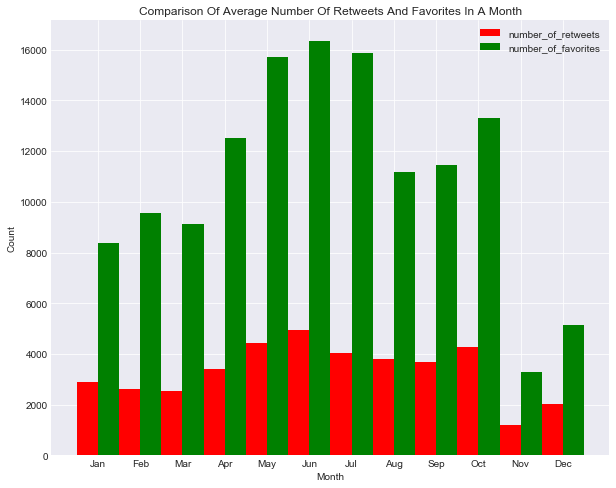

In [118]:
# Index and width for the bar graphs
index = np.arange(len(avg_retweets))
width = 0.5

# two bar graphs settled in one
plt.figure(figsize = (10, 8))
retweet_bars = plt.bar(index,avg_retweets, width, alpha = 1, color = 'r', label = 'number_of_retweets')
favorite_bars = plt.bar(index+width,avg_favorites, width, alpha = 1, color = 'g', label = 'number_of_favorites')

# title and labels
plt.title('Comparison Of Average Number Of Retweets And Favorites In A Month')
plt.xlabel('Month')
plt.ylabel('Count')
locations = index + (width/2)
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locations, x_axis_labels)

# Legend
plt.legend()

# Saving the image
plt.savefig('retweets_favorites.png')

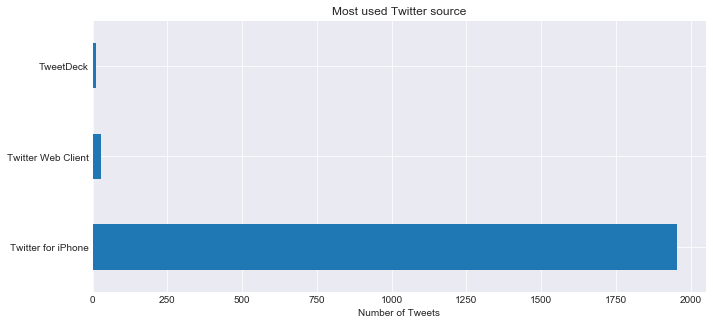

In [119]:
time_df['source'].value_counts().plot(kind='barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

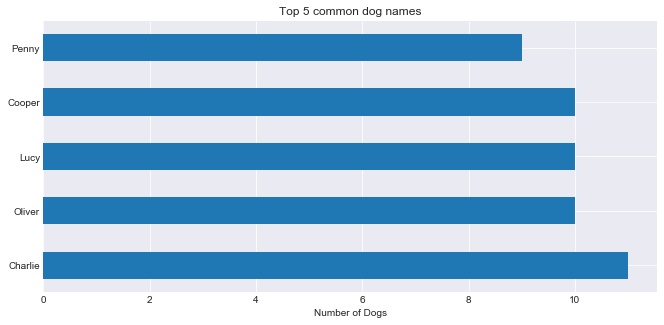

In [121]:
time_df.name.value_counts()[1:6].plot(kind='barh', figsize=(11,5), title='Top 5 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

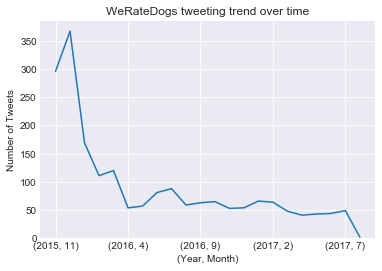

In [122]:
data = time_df.tweet_id.groupby([time_df["timestamp"].dt.year, time_df["timestamp"].dt.month]).count()
ax = data.plot(kind = 'line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

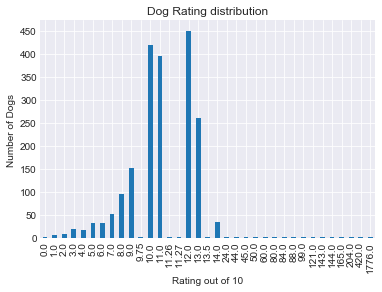

In [123]:
ax = time_df.rating_numerator.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')